# **Title of Project**


## **Wine Quality prediction using Support Vector machine**

## **Objective**

* To train the WineQuality data.
* To make prediction of wine quality (0 to 10 ) from the trained data.

## **Data Source**

We are taking the data from Github page of YBI Foundation

"https://github.com/YBI-Foundation/Dataset/blob/main/WhiteWineQuality.csv"

## **Import Library**

In [ ]:
# mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## **Import Data**

In [ ]:
wine_data = pd.read_excel('/content/drive/MyDrive/Machine Learning projects/WhiteWineQuality.xlsx')

In [ ]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
wine_data[wine_data['quality'] <= 3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
251,8.5,0.260,0.21,16.20,0.074,41.0,197.0,0.99800,3.02,0.50,9.8,3
253,5.8,0.240,0.44,3.50,0.029,5.0,109.0,0.99130,3.53,0.43,11.7,3
294,9.1,0.590,0.38,1.60,0.066,34.0,182.0,0.99680,3.23,0.38,8.5,3
445,7.1,0.320,0.32,11.00,0.038,16.0,66.0,0.99370,3.24,0.40,11.5,3
740,6.9,0.390,0.40,4.60,0.022,5.0,19.0,0.99150,3.31,0.37,12.6,3
873,10.3,0.170,0.47,1.40,0.037,5.0,33.0,0.99390,2.89,0.28,9.6,3
1034,7.9,0.640,0.46,10.60,0.092,33.0,227.0,0.99830,2.87,0.74,9.1,3
1229,8.3,0.330,0.42,1.15,0.033,18.0,96.0,0.99110,3.20,0.32,12.4,3
1417,8.6,0.550,0.35,15.55,0.057,35.5,344.0,1.00010,3.04,0.63,11.0,3
1484,7.5,0.320,0.24,4.60,0.053,8.0,134.0,0.99580,3.14,0.50,9.1,3


## **Describe Data**

In [ ]:
# Check info of the data
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
# Describe the data
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


* Fixed acidity - Most acids involved wine or fixed or nonvolatile
* Volatile acidity - The number of acetic acids in wine which at too high of levels can lead to an unpleasant, vinegar taste
* Citric acid - Can be found in small quantities, add freshness and the flavor to the wine
* Residual sugar - The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1g/L and wines with greater than 45g/L considered as sweet.
* Chlorides - The amount of salt in the wine
* Free sulfur dioxide - The free form of sulfur dioxide that is not bound to other molecules, and is used to calculate molecular sulfur dioxide
* Total sulfur dioxide - The amount of free and bound forms of sulfur dioxide
* Density - The density of water is close to that of water depending on the percent of alcohol and the sugar
* PH - Describe how acidic or basic a wine in on a scale from 0 to 14
* Sulfates - A wine additive which can contribute to sulfur dioxide gas levels, which act as an antimicrobial and antioxidant
* Alcohol - The percent alcohol content of the wine

In [ ]:
# Check the columns in data
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## **Data Visualization**

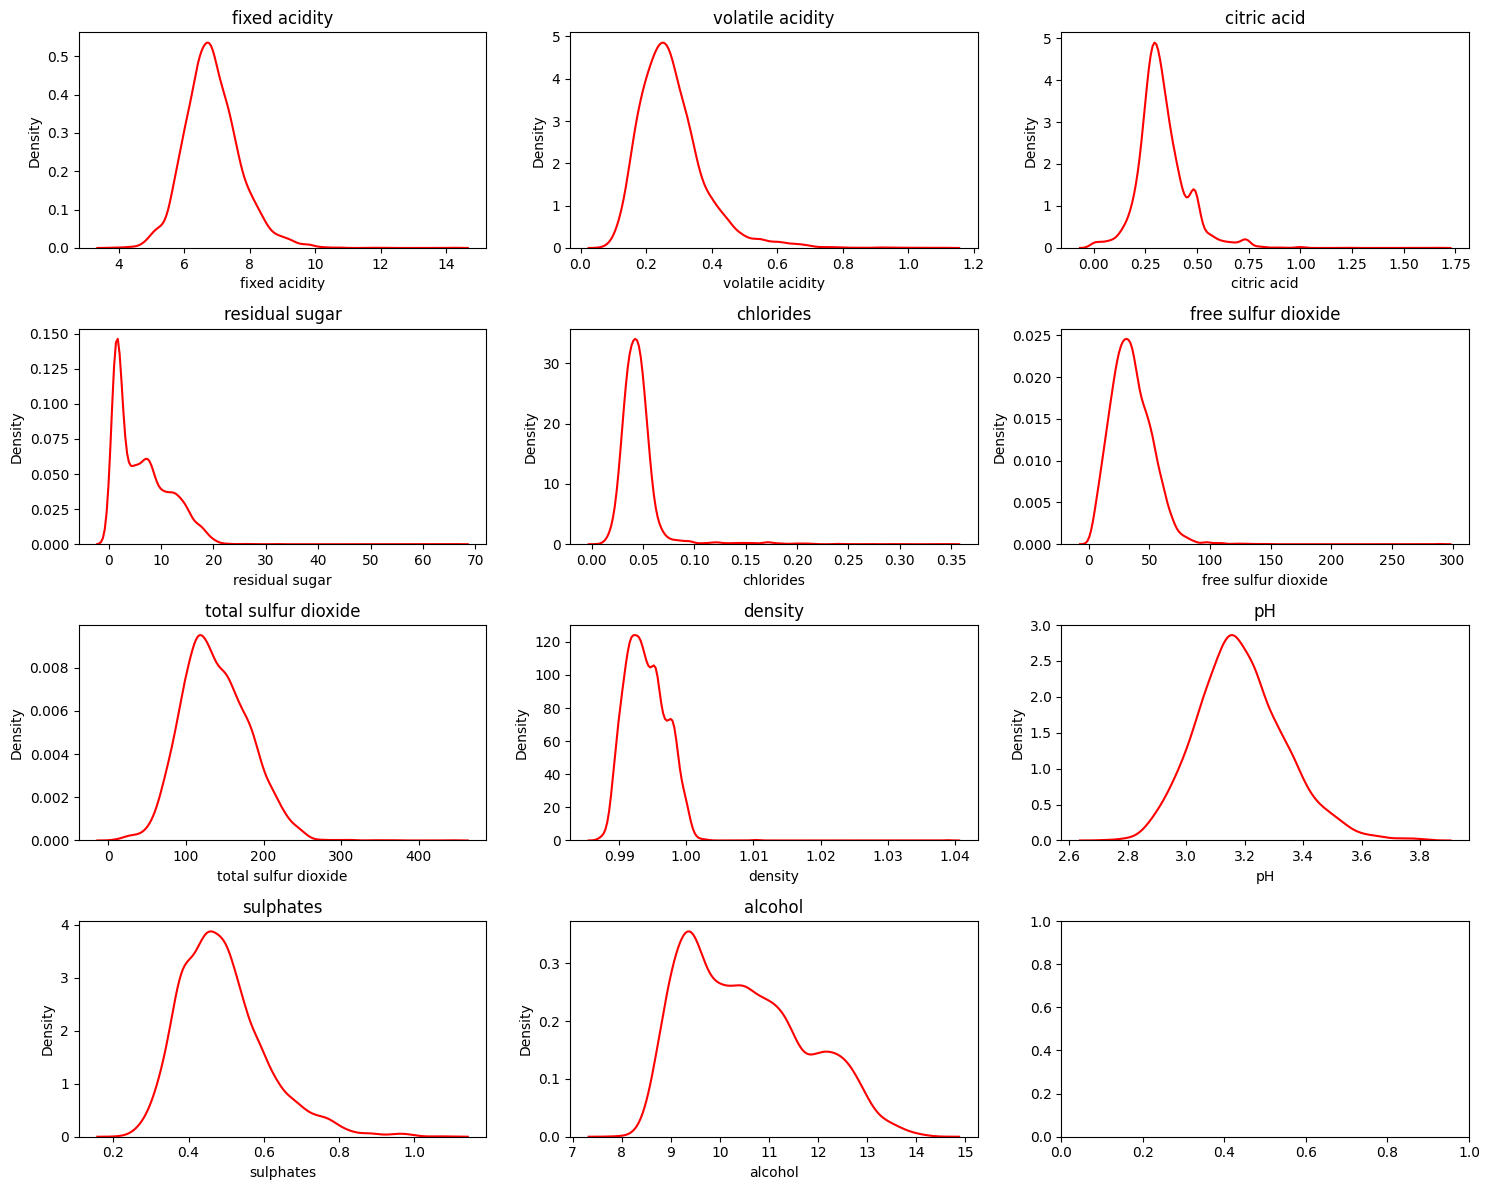

In [ ]:
# Plotting kde plot for individual feature
fig, axs = plt.subplots(4,3, figsize = (15,12))
axs = axs.flatten()

for i, col in enumerate(wine_data.drop(columns = ['quality'])):
  sns.kdeplot(wine_data[col], ax = axs[i], color = 'red')
  axs[i].set_title(col)

plt.tight_layout()
plt.show()

From the above kde plot we can clearly say that:

1. Almost all the data is rightly skewed.
2. Only pH value data is normally distributed

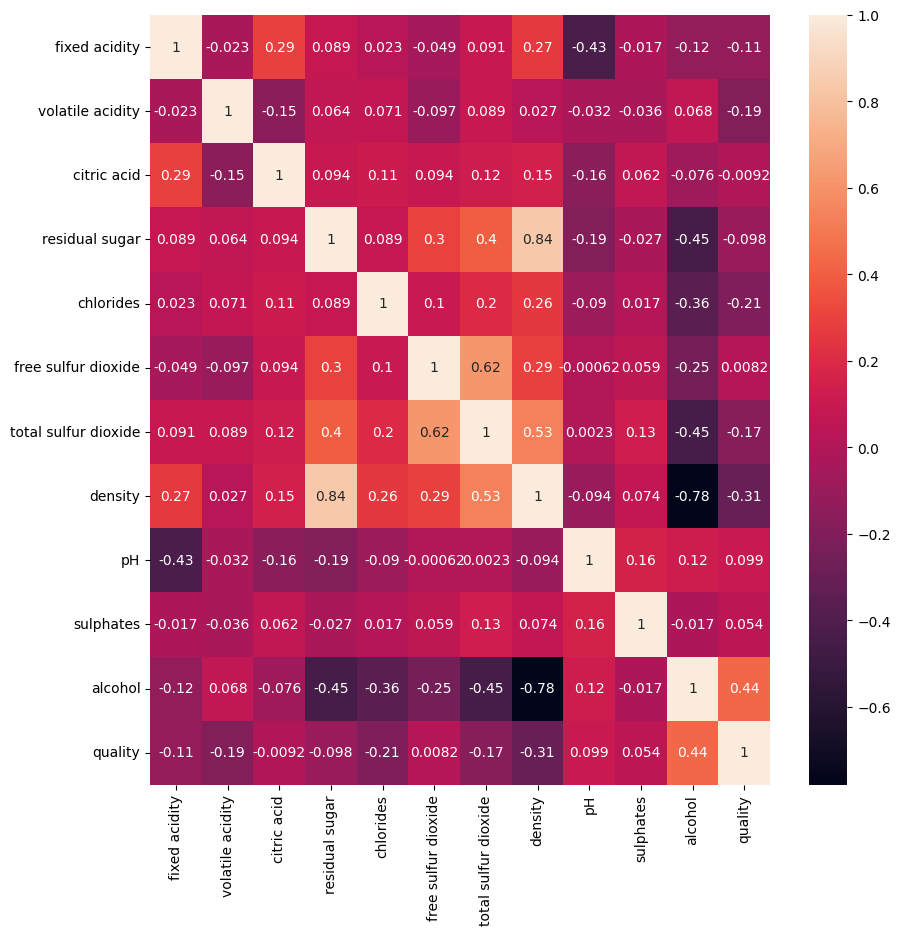

In [ ]:
# Plot heatmap for the wine_data
plt.figure(figsize = (10,10))
wine_corr = wine_data.corr()
sns.heatmap(wine_corr, annot = True)
plt.show()

From the above heatmap there is no highly correlated features.

In [ ]:
# Plotting pairplot
sns.pairplot(wine_data.drop(columns = ['quality']))
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## **Data Preprocessing**

In [ ]:
# Check the null values
wine_data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


We don't have any null data in out dataset

In [ ]:
# Check for duplicates
wine_data.duplicated().sum()

937

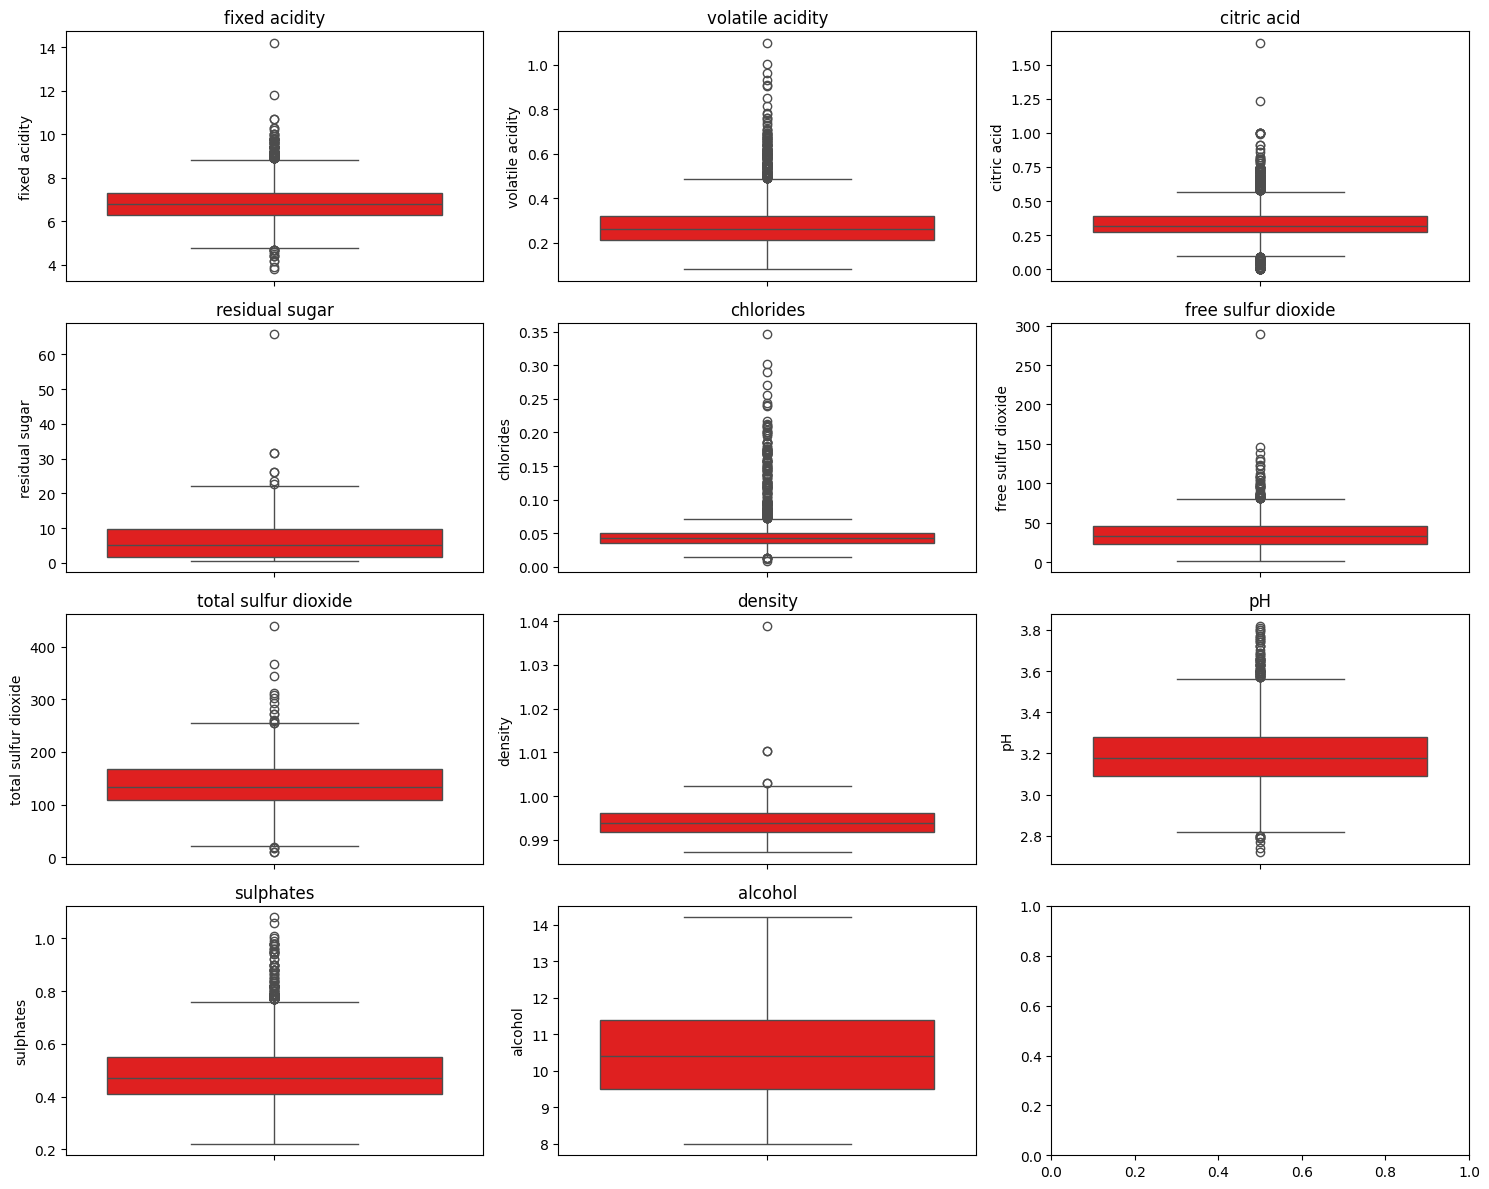

In [ ]:
# check outliers in dataset
fig, axs = plt.subplots(4,3, figsize = (15,12))
axs = axs.flatten()

for i, col in enumerate(wine_data.drop(columns = ['quality'])):
  sns.boxplot(wine_data[col], ax = axs[i], color = 'red')
  axs[i].set_title(col)

plt.tight_layout()
plt.show()

From the above box plot we can say that:

1. Every feature in data contains outliers except alcohol.

In [ ]:
for column in wine_data.columns:
  IQR = wine_data[column].quantile(0.75) - wine_data[column].quantile(0.25)
  lower_bridge = wine_data[column].quantile(0.25) - (IQR*3)
  upper_bridge = wine_data[column].quantile(0.75) + (IQR*3)

  wine_data.loc[wine_data[column] < lower_bridge, column] = lower_bridge
  wine_data.loc[wine_data[column] > upper_bridge, column] = upper_bridge

## **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
X = wine_data.drop(columns = ['quality'])
y = wine_data['quality']

In [ ]:
# Before modelling we have to normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## **Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3918, 11)
(980, 11)
(3918,)
(980,)


## **Modeling**

In [ ]:
""" 'C': [0.001,0.01,0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]  """

" 'C': [0.001,0.01,0.1, 1, 10, 100, 1000],\n    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],\n    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]  "

In [ ]:
model = SVC()
model.fit(X_train, y_train)

SVC()

## **Get Model Prediction**

In [ ]:
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_pred)

(980,)
[6 6 5 5 6 6 5 6 5 6 6 6 5 5 6 6 6 6 6 5 5 7 6 6 6 5 6 4 6 6 5 6 6 6 6 6 6
 7 6 6 6 6 7 6 6 6 5 7 6 6 5 6 6 6 5 6 6 6 6 5 6 6 6 6 5 6 6 6 6 6 5 5 6 5
 6 6 6 6 6 6 7 6 6 6 6 6 6 5 7 6 6 5 5 5 6 6 6 6 5 5 6 6 5 6 7 6 6 6 6 5 6
 5 5 5 6 5 7 5 5 7 5 6 6 7 6 5 5 6 6 6 6 7 6 6 6 5 5 6 7 5 7 6 6 6 6 6 6 6
 5 5 6 7 6 6 6 6 5 7 6 6 5 6 6 6 5 6 5 6 5 6 6 6 7 7 6 5 5 6 6 6 6 7 5 6 6
 6 6 6 6 5 6 6 6 5 7 7 5 6 5 6 6 5 6 5 6 5 5 5 6 6 5 5 6 5 6 5 6 6 6 5 6 6
 7 6 6 5 5 6 5 7 7 6 6 6 5 5 6 5 6 5 6 7 6 5 5 6 5 6 6 6 5 6 6 7 7 6 5 7 5
 6 6 6 5 6 5 5 5 7 6 4 6 6 6 6 6 6 5 6 6 7 6 6 7 6 6 6 6 4 6 5 6 5 6 6 6 6
 6 6 6 6 5 6 5 6 6 5 6 6 6 6 6 6 6 5 6 6 6 7 6 5 6 5 5 6 6 6 6 6 6 6 6 6 6
 6 5 5 6 5 6 6 5 6 5 6 6 5 5 6 6 7 5 5 6 5 6 6 5 6 6 5 6 5 6 6 5 6 6 6 5 6
 6 6 6 5 6 6 7 5 7 6 6 6 6 6 5 6 5 6 7 5 6 7 5 6 6 7 5 6 5 6 6 6 6 7 6 6 6
 5 6 6 6 6 5 6 6 6 7 6 6 6 5 7 6 5 6 6 5 6 6 5 5 6 7 6 5 6 5 6 5 6 6 6 6 6
 6 5 5 6 5 6 6 6 6 6 6 6 6 5 7 6 5 6 6 6 6 6 6 6 6 6 5 6 5 6 5 5 6 5 5 5 6
 6 6 6 6 5 6 6 6 6

## **Model Evaluation**

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0   0   1   1   0   0   0]
 [  0   2  18   9   0   0   0]
 [  0   2 158 119   1   0   0]
 [  0   0  81 340  29   0   0]
 [  0   0   4 127  49   0   0]
 [  0   0   0  27  11   0   0]
 [  0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.50      0.07      0.12        29
           5       0.60      0.56      0.58       280
           6       0.54      0.76      0.63       450
           7       0.54      0.27      0.36       180
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00         1

    accuracy                           0.56       980
   macro avg       0.31      0.24      0.24       980
weighted avg       0.54      0.56      0.53       980



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Get model Re-run with Two class created for Wine quality**

Wine Quality 3,4,5 labelled as 0

Wine Quality 6,7,8,9 labelled as 1

In [ ]:
y = wine_data['quality'].apply(lambda y_value: 1 if y_value >= 6 else 0)

In [ ]:
y.value_counts()

,count
quality,
1,3258
0,1640


## **Get Train Test split**

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y,  random_state = 2920)

In [187]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3428, 11)
(1470, 11)
(3428,)
(1470,)


## **Without hypertunning**
### **Get model Train**

In [188]:
model = SVC()
model.fit(X_train, y_train)

SVC()

### **Get Model Prediction**

In [189]:
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_pred)

(1470,)
[0 1 0 ... 1 0 1]


### **Get model Evaluation**

In [190]:
# Test evaluation
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7972789115646258
[[288 204]
 [ 94 884]]
              precision    recall  f1-score   support

           0       0.75      0.59      0.66       492
           1       0.81      0.90      0.86       978

    accuracy                           0.80      1470
   macro avg       0.78      0.74      0.76      1470
weighted avg       0.79      0.80      0.79      1470



In [191]:
# Training evaluation
X_train_pred = model.predict(X_train)
print(accuracy_score(y_train,X_train_pred))
print(confusion_matrix(y_train, X_train_pred))
print(classification_report(y_train, X_train_pred))

0.809218203033839
[[ 730  418]
 [ 236 2044]]
              precision    recall  f1-score   support

           0       0.76      0.64      0.69      1148
           1       0.83      0.90      0.86      2280

    accuracy                           0.81      3428
   macro avg       0.79      0.77      0.78      3428
weighted avg       0.81      0.81      0.80      3428



## **By using RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter space
param_dist = {
    'C': np.logspace(-3, 3, 10),               # Regularization parameter
    'gamma': np.logspace(-4, 1, 10),           # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
    'degree': [2, 3, 4, 5],                    # Degree for 'poly' kernel
    'coef0': [0.0, 0.1, 0.5, 1.0]              # Independent term in poly and sigmoid kernel
}

# Initialize the Support Vector Classifier
svc = SVC()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svc,
                                   param_distributions=param_dist,
                                   n_iter=50,  # Number of random combinations to try
                                   scoring='accuracy',  # Metric to optimize
                                   cv=5,  # Number of cross-validation folds
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)  # Use all available cores

random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.57      0.62       492
           1       0.80      0.87      0.83       978

    accuracy                           0.77      1470
   macro avg       0.75      0.72      0.73      1470
weighted avg       0.76      0.77      0.76      1470

Confusion Matrix:
 [[280 212]
 [126 852]]
Best Hyperparameters: {'kernel': 'rbf', 'gamma': 0.21544346900318845, 'degree': 2, 'coef0': 0.1, 'C': 2.154434690031882}


### **Get model Train**

In [192]:
svc = SVC(kernel = 'rbf', gamma = 0.21544346900318845, degree =  2, coef0 =  0.1, C =  2.154434690031882)
svc.fit(X_train, y_train)

SVC(C=2.154434690031882, coef0=0.1, degree=2, gamma=0.21544346900318845)

### **Get Model Prediction**

In [193]:
y_pred = svc.predict(X_test)
print(y_pred.shape)
print(y_pred)

(1470,)
[0 1 0 ... 1 0 1]


### **Get model evaluation**

In [194]:
# Test evaluation
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7952380952380952
[[300 192]
 [109 869]]
              precision    recall  f1-score   support

           0       0.73      0.61      0.67       492
           1       0.82      0.89      0.85       978

    accuracy                           0.80      1470
   macro avg       0.78      0.75      0.76      1470
weighted avg       0.79      0.80      0.79      1470



In [195]:
# Training evaluation
X_train_pred = svc.predict(X_train)
print(accuracy_score(y_train,X_train_pred))
print(confusion_matrix(y_train, X_train_pred))
print(classification_report(y_train, X_train_pred))

0.8923570595099183
[[ 904  244]
 [ 125 2155]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1148
           1       0.90      0.95      0.92      2280

    accuracy                           0.89      3428
   macro avg       0.89      0.87      0.88      3428
weighted avg       0.89      0.89      0.89      3428



## **Get Future Predictions**

**Lets Select a random sample from existing dataset as new value**

steps to follow
1. Extract a random row using sample function
2. Separate X and y
3. Standardize X
4. Predict

In [196]:
wine_data_new = wine_data.sample(2)

In [197]:
wine_data_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4838,5.3,0.275,0.24,7.4,0.038,28.0,114.0,0.99313,3.38,0.51,11.0,6
680,6.7,0.280,0.14,1.4,0.043,64.0,159.0,0.99200,3.17,0.39,10.0,5


In [198]:
wine_data_new.shape

(2, 12)

In [199]:
# Separating X and y
X_new =  wine_data_new.drop(columns = ['quality'])
y_new = wine_data_new['quality']

In [200]:
# standardize X
X_new = scaler.fit_transform(X_new)

In [201]:
# prediction
y_pred_new = model.predict(X_new)

In [202]:
print(y_pred_new)

[1 0]


## **Explaination**

1. I have used Support Vector Classifier as my model for training.
2. Before training, I preprocess the data, split the data into X_train, X_test, y_test and y_train.
3. I have divided the quality as:

Wine Quality 3,4,5 labelled as 0

Wine Quality 6,7,8,9 labelled as 1
4. I have trained data two times with Hyperparameter tunning and without hyperparameter tunning.
5. After hyperparameter tunning I didn't see any changes in test accuracy but there is slight increament in training accuracy.